### 최적화 실습 과제

1. Wafer to allocation 문제의 최적해를 Solver로 구하시오. 

2. Wafer to allocation 문제 해결을 위한 간단한 알고리즘을 제시하고, 해를 구하시오. 

3. Solver의 성능과 제안한 알고리즘의 성능을 1) 목적함수, 2) 연산시간의 관점에서 비교하시오. 



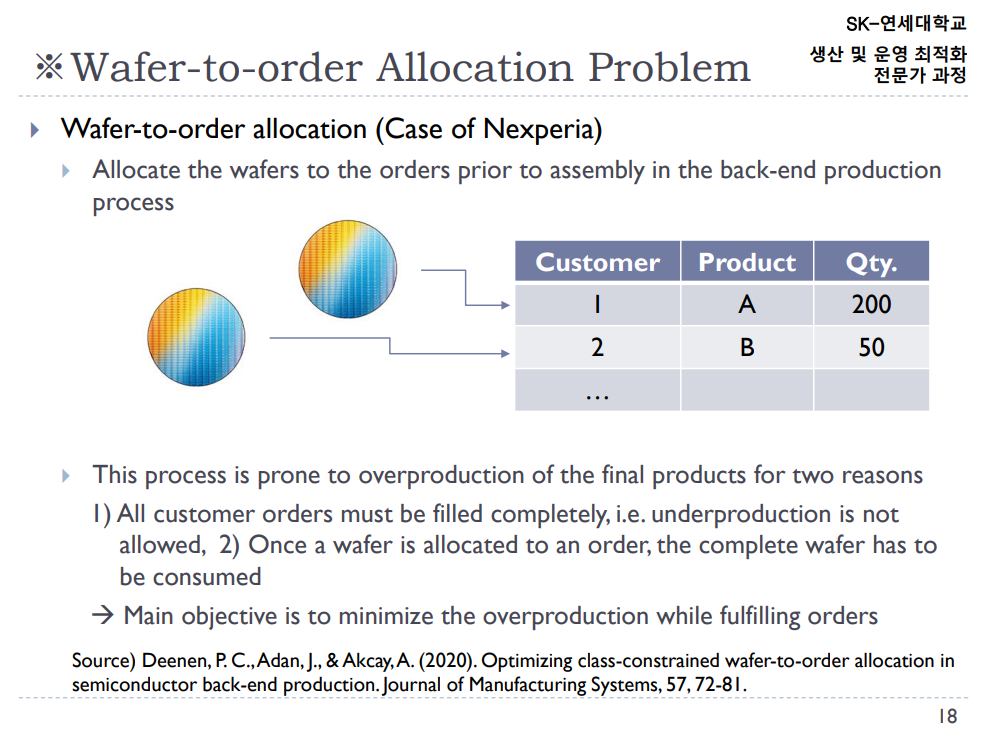
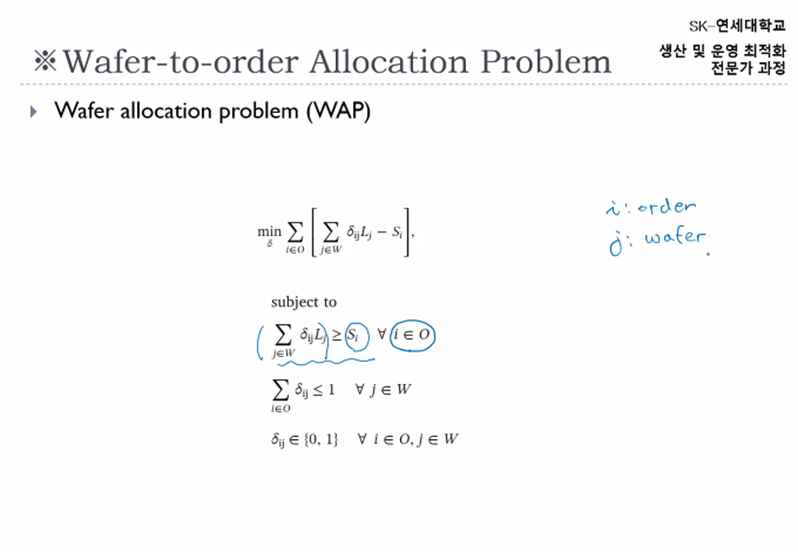
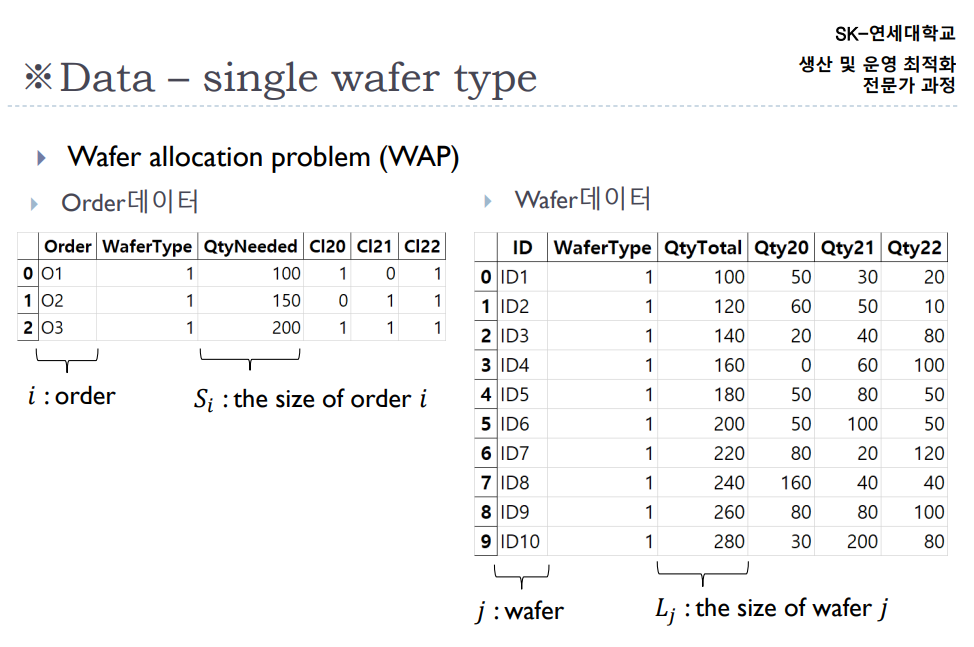

In [46]:
import cvxpy as cp
import os
import numpy as np
import time
import pandas as pd
PATH = os.getcwd()
files = os.listdir('./raw_data')

file = [file for file in files]
file_paths = [os.path.join(PATH + '\\raw_data' ,file) for file in files]

##### Input data
## small size
order_data = pd.read_excel(file_paths[0])
wafer_data = pd.read_excel(file_paths[2])
## big size
# order_data = pd.read_excel(file_paths[1])
# wafer_data = pd.read_excel(file_paths[3]) 

##### Data Preprocessing
order = order_data.copy()
order = order.iloc[:, 1:-3]
order_arr = np.array(order.QtyNeeded)
order

,Order,WaferType,QtyNeeded
0,O1,1,100
1,O2,1,150
2,O3,1,200


In [47]:
wafer_data.head() # 500 10
wafer = wafer_data.copy()
wafer = wafer.iloc[:, 1:-3]
wafer_arr = np.array(wafer.QtyTotal)
wafer

,ID,WaferType,QtyTotal
0,ID1,1,100
1,ID2,1,120
2,ID3,1,140
3,ID4,1,160
4,ID5,1,180
5,ID6,1,200
6,ID7,1,220
7,ID8,1,240
8,ID9,1,260
9,ID10,1,310


In [50]:
############### 문제 풀이 ################ 
start_time = time.time()
large_s = order_arr # i
large_l = wafer_arr # j
idx_s = len(large_s)
idx_l = len(large_l)
## 제약식 3 추가
delta = cp.Variable((idx_s, idx_l), boolean=True)
obj = cp.Variable(boolean=True)
for i in range(idx_s):
    obj += sum([delta[i][j] * large_l[j] for j in range(idx_l)]) - large_s[i]
obj = cp.Minimize(obj)
# print(obj)
constraints = []
## 제약식 1 생성
for i in range(idx_s):
    constraints += [sum([delta[i][j] * large_l[j] for j in range(idx_l)]) >= large_s[i]]
## 제약식 2 생성
for j in range(idx_l):
    constraints += [sum([delta[i][j] for i in range(idx_s)]) <= 1]
## 제약식 확인
# for cons in constraints:
#     print(cons)
## 최적화 모형 구성
prob = cp.Problem(obj, constraints)
## 최적화
prob.solve() # auto solver
print('1.최적해 상태: ', prob.status)
print('2.최적값: ', prob.value)
print('3.최적해 delta:\n', delta.value)
print('4.연산 시간: %s'% (time.time() - start_time))
# print("5.주문 세부 사항 ")
# for i in range(idx_s):
#     print(f"Overproduction of Order{i}  : {sum(wafer_arr[delta.value[i] == 1] - order_arr[i])} ea")

SolverError: 

                    You need a mixed-integer solver for this model. Refer to the documentation
                        https://www.cvxpy.org/tutorial/advanced/index.html#mixed-integer-programs
                    for discussion on this topic.

                    Quick fix 1: if you install the python package CVXOPT (pip install cvxopt),
                    then CVXPY can use the open-source mixed-integer linear programming
                    solver `GLPK`. If your problem is nonlinear then you can install SCIP
                    (pip install pyscipopt).

                    Quick fix 2: you can explicitly specify solver='ECOS_BB'. This may result
                    in incorrect solutions and is not recommended.
                

In [129]:
start_time = time.time()
### 주문수가 큰 것부터 재정리
sorted_order_arr = sorted(order_arr, reverse= True)
wafer_size = len(wafer_arr) # 10 i
order_size = len(order_arr) # 3 j

### 빈 list 생성 (order와 동일한 크기)
matching_list = ['' for i in range(order_size)] # 3
min_val = 9999
### 0일 경우, matching_list에 추가
### 전체 iter를 했는데도 0이 없는 경우 #### any or all 조건 활용 필요
for j in range(order_size):
    for i in range(wafer_size):
        if wafer_arr[i] - sorted_order_arr[j] == 0:
            j_idx = np.where(sorted_order_arr[j] == order_arr)[0][0]
            wafer_arr[i] = 0
            print(j, i)
            matching_list[j_idx] = (j_idx,i,0)
while not all(matching_list):
    for z in range(wafer_size):
        if wafer_arr[z] - sorted_order_arr[matching_list.index('')] < 0: # j
            pass
        else:
            con1 = wafer_arr[z] - sorted_order_arr[matching_list.index('')]
            print("++1",wafer_arr[z], wafer_arr[z] - sorted_order_arr[matching_list.index('')] )
            if min_val >  con1 :
                min_val = con1
                matching_list[matching_list.index('')] = (matching_list.index(''),i,min_val)
                break
print('After',wafer_arr, len(wafer_arr))
print(min_val)
# print(matching_list, matching_list.index(''))
print(matching_list)
# print('1.최적해 상태: ', prob.status)
# print('2.최적값: ', prob.value)
# print('3.최적해 delta:\n', delta.value)
# print('4.연산 시간: %s'% (time.time() - start_time))
# print("5.주문 세부 사항 ")

0 5
2 0
++1 160 10
After [  0 120 140 160 180   0 220 240 260 310] 10
10
[(0, 0, 0), (1, 9, 10), (2, 5, 0)]


In [194]:
'''같은 수가 있는 경우'''

import cvxpy as cp
import os
import numpy as np
import pandas as pd
import time
PATH = 'D:\python'
files = os.listdir(PATH)
file = [file for file in files]
file_paths = [os.path.join(PATH, file) for file in files]

##### Input data
## small size
order_data =  pd.read_excel(os.path.join(PATH, file[0]))
wafer_data = pd.read_excel(os.path.join(PATH, file[2]))
wafer_data.head() # 500 10
wafer = wafer_data.copy()
wafer = wafer.iloc[:, 1:-3]
wafer_arr = np.array(wafer.QtyTotal)
order_arr = np.array([100,100,200,250])
sorted_order_arr = sorted(order_arr, reverse= True)
wafer_size = len(wafer_arr) # 10 i
order_size = len(order_arr)
print(sorted_order_arr)

###### 0이 아닌 경우가 2개 이상 있는 경우
start_time = time.time()
### 주문수가 큰 것부터 재정리
sorted_order_arr = sorted(order_arr, reverse= True)
wafer_size = len(wafer_arr) # 10 i
order_size = len(order_arr) # 4 j
### 빈 list 생성 (order와 동일한 크기)
matching_list = ['' for i in range(order_size)] # 4
### 0일 경우, matching_list에 추가
### 전체 iter를 했는데도 0이 없는 경우 #### any or all 조건 활용 필요
for j in range(order_size):
    for i in range(wafer_size):
        if wafer_arr[i] - sorted_order_arr[j] == 0:
            j_idx = np.where(sorted_order_arr[j] == order_arr)[0][0] 
            wafer_arr[i] = 0
            matching_list[j] = (j_idx,i,0)
            print(matching_list)
while not all(matching_list):
    min_val = 9999
    for z in range(wafer_size):
        if wafer_arr[z] - sorted_order_arr[matching_list.index('')] < 0: # j
            print(wafer_arr[z], sorted_order_arr[matching_list.index('')])
            pass
        else:
            con1 = wafer_arr[z] - sorted_order_arr[matching_list.index('')]
            print("++1",wafer_arr[z], order_arr[matching_list.index('')], con1 )
            if min_val >  con1 :
                min_val = con1
                wafer_arr[z] = 0
                ori_j_idx = np.where(sorted_order_arr[matching_list.index('')] == order_arr)[0][0]
                print(ori_j_idx)
                matching_list[matching_list.index('')] = (ori_j_idx, z, min_val)
                if matching_list.count('') > 0 :
                    print("this", all(matching_list), matching_list, z, matching_list.index(''), min_val)
                    pass
                else:
                    print("that")
                    break

print('After',wafer_arr, len(wafer_arr))
print(min_val)
print(matching_list, matching_list.count(''))

[250, 200, 100, 100]
['', (2, 5, 0), '', '']
['', (2, 5, 0), (0, 0, 0), '']
0 250
120 250
140 250
160 250
180 250
0 250
220 250
240 250
++1 260 100 10
3
this False [(3, 8, 10), (2, 5, 0), (0, 0, 0), ''] 8 3 10
++1 310 250 210
0 100
++1 120 250 20
0
that
After [  0   0 140 160 180   0 220 240   0 310] 10
20
[(3, 8, 10), (2, 5, 0), (0, 0, 0), (0, 1, 20)] 0


In [ ]:
##### 새로운 알고리즘 풀이 #####
start_time = time.time()
sorted_order_arr = sorted(order_arr, reverse= True)
wafer_size = len(wafer_arr) # 10 i
order_size = len(order_arr)
sorted_order_arr = sorted(order_arr, reverse= True)
wafer_size = len(wafer_arr) # 10 i
order_size = len(order_arr) # 4 j
matching_list = ['' for i in range(order_size)] # 4
for j in range(order_size):
    for i in range(wafer_size):
        if wafer_arr[i] - sorted_order_arr[j] == 0:
            j_idx = np.where(sorted_order_arr[j] == order_arr)[0][0] 
            wafer_arr[i] = 0
            matching_list[j] = (i,0)
print(matching_list)
while not all(matching_list):
    min_val = 9999
    for z in range(wafer_size):
        if wafer_arr[z] - sorted_order_arr[matching_list.index('')] < 0: # j
            pass
        else:
            con1 = wafer_arr[z] - sorted_order_arr[matching_list.index('')]
            if min_val >  con1 :
                min_val = con1
                ori_j_idx = np.where(sorted_order_arr[matching_list.index('')] == order_arr)[0][0]
                wafer_arr[z] = 0
                matching_list[matching_list.index('')] = (z, min_val)
                if matching_list.count('') > 0 :
                    pass
                else:
                    break
### 최적해
print('1.최적해 상태: 새로운 알고리즘 적용')
print('2.연산 시간: %s'% (time.time() - start_time))
### 최적값 
optimal_value = 0
for match_value in matching_list:
    optimal_value += match_value[-1]    
print('3.최적값: ', optimal_value)
# print('4.최적해 :')
# for idx, value in enumerate(matching_list):
#     print(f'Order {sorted_order_arr[idx]} ea.는 wafer ID{ value[0]} 할당')

## 연습 노트

1. 상단은 문제 풀이입니다.
2. 하단은 문제를 풀기 위한 연습 과정입니다.

In [ ]:
##### Solution
### 목적 함수 생성 과정
import numpy as np
import cvxpy as cp
large_s = order_arr
large_l = wafer_arr
idx_s = len(large_s)
idx_l = len(large_l)
## 제약식 3 추가
delta = cp.Variable((idx_s, idx_l), boolean=True)
for i in range(len(large_s)):
    obj = sum([delta[i][j] * large_l[j] - large_s[i] for j in range(len(large_l))])
    obj += obj
# print(obj)
## 목적함수 정의
obj = cp.Minimize(obj)
## 제약식 1 생성
constraints = []
for i in range(idx_s):
    constraints += [sum([delta[i][j] * large_l[j] for j in range(idx_l)]) >= large_s[i]]
## 제약식 2 생성
for j in range(idx_l):
    constraints += [sum([delta[i][j] for i in range(idx_s)]) <= 1]
    
## 최적화 모형 구성
prob = cp.Problem(obj, constraints)

## 최적화
prob.solve() # auto solver
# prob.solve(solver = cp.OSQP)
# prob.solve(solver = cp.CBC)
# print(prob.solve(solver = cp.SCS))

print('최적해 상태: ', prob.status)
print('최적값: ', prob.value)
print('최적해 delta:\n', delta.value)   

In [ ]:
for i in range(idx_s):
    obj = sum([delta[i][j] * large_l[j] for j in range(idx_l)]) - large_s[i]
print(obj)

In [ ]:
##### Checking
constraints = []
for i in range(idx_s):
    constraints += [sum([delta[i][j] * large_l[j] for j in range(len(large_l))]) >= large_s[i]]
for j in range(idx_l):
    constraints += [sum([delta[i][j] for i in range(idx_s)]) <= 1] # cons 1 
for cons in constraints:
    print(cons)

In [ ]:
##### ref. Simple example 
import numpy as np
import cvxpy as cp
large_s = np.array([5,5,5,5,5])
large_l = np.array([1,2,3,4,5])

# delta = cp.Variable(boolean=True) # cons 3
delta = 1

##### obj
# for i in range(len(large_s)):
#     obj = sum([delta * large_l[j] - large_s[i] for j in range(len(large_l))])
#     obj += obj
# print(obj)
constraints = []
# constraints += [sum([delta * large_l[j] for j in range(len(large_l))]) >= large_s[i] for i in range(len(large_s))] # cons 1
for j in range(idx_l):
    constraints += [sum([delta[i][j] for i in range(idx_s)]) >= 1] # cons 1 
# constraints += [delta[i] for i in range(len(large_s))] # cons 2
print(constraints)

##### Trial 
# import numpy as np
# import cvxpy as cp
# large_l = cp.Variable()
# large_s = cp.Variable()
# delta = cp.Variable((2,2), boolean=True) # cons 3
# # for i in range(2):
# #     obj = sum([delta * large_l[j] - large_s[i] for j in range(2)])
# #     obj += obj
# print(delta.shape)
# #     print(i)

In [ ]:
##### ref.
# 2.4-4 Quiz p.21
#1 모델링 라이브러리 선언
import cvxpy as cp

#2 의사결정변수 정의
x1 = cp.Variable(nonneg = True)
x2 = cp.Variable(nonneg = True)
x3 = cp.Variable(nonneg = True)
x4 = cp.Variable(nonneg = True)
I1 = cp.Variable(nonneg = True)
I2 = cp.Variable(nonneg = True)
I3 = cp.Variable(nonneg = True)
sp1 = cp.Variable(nonneg = True)
sp2 = cp.Variable(nonneg = True)
sp3 = cp.Variable(nonneg = True)
sp4 = cp.Variable(nonneg = True)
sn1 = cp.Variable(nonneg = True)
sn2 = cp.Variable(nonneg = True)
sn3 = cp.Variable(nonneg = True)
sn4 = cp.Variable(nonneg = True)
#3 목적함수 정의
obj = cp.Minimize(50 * (I1 + I2 + I3)
                  + 200 * (sp1 + sp2 + sp3 + sp4)
                  + 400 * (sn1 + sn2 + sn3 + sn4))
#4 제약식 정의
constraints = [10 * x1 == I1 + 400,
               I1 + 10 * x2 == I2 + 600,
               I2 + 10 * x3 == I3 + 400,
               I3 + 10 * x4 == 500,
               x1 == sp1 - sn1,
               x2 == x1 + sp2 - sn2,
               x3 == x2 + sp3 - sn3,
               x4 == x3 + sp4 - sn4]

#5 최적화 모형 구성
prob = cp.Problem(obj, constraints)

#6 최적화
prob.solve()

print('최적해 상태: ', prob.status)
print('최적값: ', prob.value)
print('최적해 x1: ', x1.value)
print('최적해 x2: ', x2.value)
print('최적해 x3: ', x3.value)
print('최적해 x4: ', x4.value)
print('최적해 I1: ', I1.value)
print('최적해 I2: ', I2.value)
print('최적해 I3: ', I3.value)
print('최적해 sp1: ', sp1.value)
print('최적해 sp2: ', sp2.value)
print('최적해 sp3: ', sp3.value)
print('최적해 sp4: ', sp4.value)
print('최적해 sn1: ', sn1.value)
print('최적해 sn2: ', sn2.value)
print('최적해 sn3: ', sn3.value)
print('최적해 sn4: ', sn4.value)